In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC

import  pickle

In [21]:
dataset=pd.read_csv('heart.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

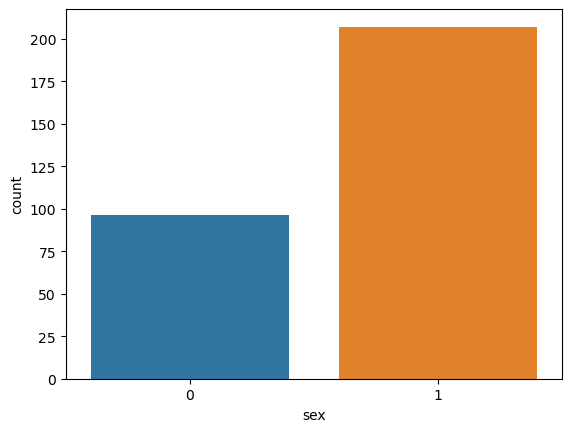

In [23]:
sns.countplot(data=dataset,x='sex')

In [24]:
dataset.groupby('sex')['target'].mean()

sex
0    0.750000
1    0.449275
Name: target, dtype: float64

<Axes: >

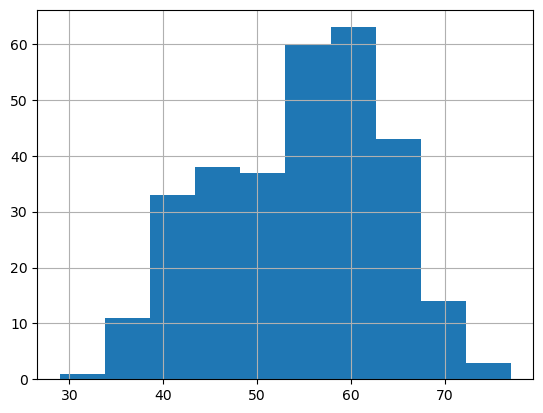

In [25]:
dataset['age'].hist()

In [26]:
x=dataset.iloc[:,:-1].values
y=dataset['target']


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,train_size=0.7)

In [28]:
x_train.shape

(212, 13)

In [29]:
knn_model=KNeighborsClassifier(n_neighbors=18)


In [30]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [31]:
knn_model.score(x_train,y_train)

0.7122641509433962

In [32]:
print(metrics.classification_report(y_test,knn_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.61      0.66      0.64        41
           1       0.70      0.66      0.68        50

    accuracy                           0.66        91
   macro avg       0.66      0.66      0.66        91
weighted avg       0.66      0.66      0.66        91



In [33]:
metrics.accuracy_score(y_test,knn_model.predict(x_test))

0.6593406593406593

0.6703296703296703


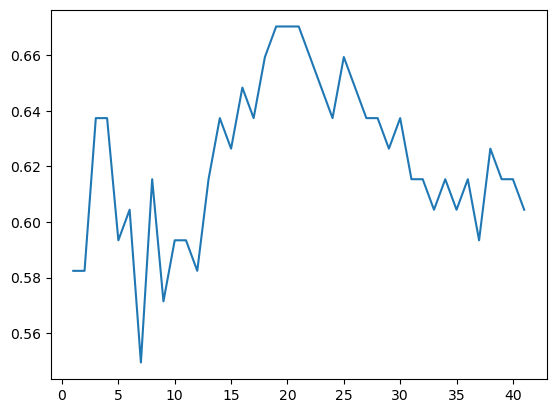

In [34]:
hi=list(range(1,42))
acc=list()
best=0
for i in hi:
    knn_model=KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn_model.fit(x_train,y_train)
    y_pred=knn_model.predict(x_test)
    acc.append(metrics.accuracy_score(y_test,y_pred))
    # if acc>best:
    #     best=acc
    #     with open("knn.pickle",'wb') as f:
    #         pickle.dump(knn_model,f)
plt.plot(hi,acc)
print(sorted(acc)[-1])

In [35]:
# new=pickle.load(open('knn.pickle','rb'))

In [47]:
clf=SVC(C=1,kernel='linear',random_state=3244,gamma='auto')
clf.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='linear', random_state=3244)

In [48]:
y_pred=clf.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7692307692307693


In [40]:
params={
    'C':[0,1,10],
    'kernel':['linear'],
    'gamma':['auto',0.1]

}
grid=R(SVC(),param_grid=params,scoring='accuracy',cv=5,n_jobs=-1,verbose=4,)

In [41]:
grid.fit(x,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklea

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0, 1, 10], 'gamma': ['auto', 0.1],
                         'kernel': ['linear']},
             scoring='accuracy', verbose=4)

In [42]:
grid.best_estimator_

SVC(C=1, gamma='auto', kernel='linear')

In [49]:
grid.best_score_*100

82.83060109289619

In [46]:
grid.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}